In [1]:
import numpy as np
import pandas as pd

In [2]:
# Show all column in head()
pd.set_option('display.max_columns', None)

In [3]:
tweet_df = pd.read_csv('full_merged_tweet_df.csv')

In [4]:
tweet_df.head()

tweetId           created_at lang  isRetweet  \
0  418443702579654656  2014-01-01 13:08:00   en      False   
1  418396495692316672  2014-01-01 10:01:00   en      False   
2  418198017015959552  2013-12-31 20:52:00   en      False   
3  418600422740197378  2014-01-01 23:31:00   en       True   
4  418765690913705984  2014-01-02 10:28:00   en       True   

  parent_tweet_created_at  hoursDiffFromParent  tweet_userId  followers_count  \
0     2014-01-01 13:08:00                    0      23059499            48108   
1     2014-01-01 10:01:00                    0      23669783            14958   
2     2013-12-31 20:52:00                    0      23954327            17449   
3     2013-12-30 11:13:00                   60    1653399757               21   
4     2014-01-02 08:55:00                    1    1951070833                5   

  company_name afinn_verdict  afinn_score  afinn_comparative  \
0         AAPL      POSITIVE            1           0.166667   
1         AAPL      NEGATIVE           -1          -0.142857   
2         AAPL      POSITIVE            2           0.153846   
3         AAPL      POSITIVE            1           0.066667   
4         AAPL      POSITIVE            6           0.272727   

   no_of_positive_words  no_of_negative_words positive_words negative_words  \
0                     1                     0          boost            NaN   
1                     1                     1            big        screwed   
2                     1                     0    intelligent            NaN   
3                     1                     0           huge            NaN   
4                     2                     0       wins,top            NaN   

                                        cleaned_text  \
0                    itv will boost apple aapl apple   
1                apple screwed up big time amzn aapl   
2  iphone users are more intelligent than samsung...   
3  rt stocktwits here's how apple could be making...   
4  rt philstockworld our top 3 trade ideas for 20...   

                                            raw_text                 Date  \
0  iTV Will Boost Apple http://t.co/8dup4cQc08 $A...  2013-12-31 00:00:00   
1  Apple Screwed Up Big Time http://t.co/Q2Pzk2VO...  2013-12-31 00:00:00   
2  #iPhone users are more intelligent than #Samsu...  2014-01-02 00:00:00   
3  RT @StockTwits: Here's how Apple could be maki...  2014-01-02 00:00:00   
4  RT @philstockworld: Our Top 3 Trade Ideas for ...  2014-01-02 00:00:00   

        Open       High        Low      Close  Adj Close      Volume  \
0  79.167145  80.182854  79.142860  80.145714  74.571281  55771100.0   
1  79.167145  80.182854  79.142860  80.145714  74.571281  55771100.0   
2  79.382858  79.575714  78.860001  79.018570  73.522530  58671200.0   
3  79.382858  79.575714  78.860001  79.018570  73.522530  58671200.0   
4  79.382858  79.575714  78.860001  79.018570  73.522530  58671200.0   

  volume_vs_5d_avg_vol 5d_gain_percent      5d_loss_percent  \
0   0.8247825024741509             0.0  -3.6823170150788154   
1   0.8247825024741509             0.0  -3.6823170150788154   
2   1.0924095936438591             0.0   -3.336839927252859   
3   1.0924095936438591             0.0   -3.336839927252859   
4   1.0924095936438591             0.0   -3.336839927252859   

    20d_gain_percent     20d_loss_percent  
0                0.0   -9.996391335870344  
1                0.0   -9.996391335870344  
2  0.569090715290336  -10.021373192729229  
3  0.569090715290336  -10.021373192729229  
4  0.569090715290336  -10.021373192729229

In [5]:
tweet_df.shape

(44901, 30)

In [6]:
hf_df = tweet_df.loc[tweet_df['followers_count']>1000]
print(hf_df.shape)

(12697, 30)


In [7]:
hf_df.to_csv('hf_df.csv', index=False )

In [8]:
# Drop all non required, low varinace columns
#tweet_df = tweet_df.drop(['tweetId', 'created_at', 'lang', 'parent_tweet_created_at', 'tweet_userId'], axis=1)

In [9]:
# Clean the raw text
import re
def getCleanText(aText) :
    retText = re.sub('^RT\s','', aText) # Replace RT<space> at the begining
    retText = re.sub('https?://[\w./]+\s?','', retText) # Replace all http links
    #retText = re.sub('\s?https?://[\w./?]+','', retText) # Replace all http links
    retText = re.sub('\$','', retText) # Replace $ highlighter char
    retText = re.sub('\s+#[\w]+','', retText) # Replace hashtags words like #AAPL
    retText = re.sub('\'.?','', retText) # Single quotes
    retText = re.sub('@[\w:?]+\s','', retText) # @word (Addressing to someone)
    retText = re.sub('\r','', retText)
    retText = re.sub('\n','. ', retText) # Newline to fullstop
    retText = re.sub('!','', retText) # Newline to fullstop
    retText = re.sub('\d','', retText) # Newline to fullstop
    retText = re.sub('_{1,}','', retText) # Newline to fullstop
    retText = re.sub('[^a-zA-Z0-9_\'\"\s]','', retText) # Finally replace all non english charaters
    return retText

In [10]:
tweet_df['cleaned_text_new'] = tweet_df['raw_text'].apply(getCleanText)

In [11]:
tweet_df.cleaned_text_new

0                                iTV Will Boost Apple AAPL
1                      Apple Screwed Up Big Time AMZN AAPL
2        iPhone users are more intelligent than and HTC...
3        Here how Apple could be making a huge push int...
4        Our Top  Trade Ideas for  and Two  Futures Win...
                               ...                        
44896                                    DEAD Ya little ST
44897    United Technologies Co UTX Stake Raised by Dai...
44898    COST May have a bunch non COST shoppers pay fo...
44899    Heres Why Wells Fargo WFC Stock is Gaining Today 
44900    XOM Shares in Focus Exxon Mobil Corporation NY...
Name: cleaned_text_new, Length: 44901, dtype: object

In [12]:
tweet_df.to_csv('clean.csv', columns=['raw_text', 'cleaned_text', 'cleaned_text_new'], index=False)

In [13]:
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tweet_tokenizer = TweetTokenizer()
stemmer = SnowballStemmer("english")
wordnet_lemmatizer = WordNetLemmatizer()
vectorizer = CountVectorizer()
    
def preProcessText(tweet_text, stem=True) :  
    tweet_text = tweet_text.lower()
    sentences = sent_tokenize(tweet_text) # Split sentences first. Each tweet may have one or more tweets.
    final_tokens = []
    for a_sentence in sentences:        
        bag_of_words = tweet_tokenizer.tokenize(a_sentence) # words = word_tokenize(a_sentence)
        bag_of_words = [word for word in bag_of_words if word not in stopwords.words('english')] # Filter English stopwords
        
        if stem:
            bag_of_words = [stemmer.stem(token) for token in bag_of_words] # # Stemming using snowball
        else:
            bag_of_words = [wordnet_lemmatizer.lemmatize(token, pos='v') for token in bag_of_words]
        
        final_tokens = final_tokens + bag_of_words
    return " ".join(final_tokens)

In [14]:
tweet_df['preprocessed_text'] = tweet_df['cleaned_text_new'].apply(preProcessText)

In [15]:
tweet_df.to_csv('preprocessed.csv', columns=['raw_text', 'cleaned_text', 'cleaned_text_new', 'preprocessed_text'], index=False)

In [16]:
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(tweet_df['preprocessed_text'])
print(bow_model)

  (0, 10536)	1
  (0, 2494)	1
  (0, 1031)	1
  (0, 14)	1
  (1, 1031)	1
  (1, 14)	1
  (1, 17725)	1
  (1, 2104)	1
  (1, 20270)	1
  (1, 813)	1
  (2, 14)	1
  (2, 10398)	1
  (2, 21394)	1
  (2, 10275)	1
  (2, 9570)	1
  (2, 14774)	1
  (2, 1821)	1
  (3, 1031)	1
  (3, 14)	1
  (3, 4569)	1
  (3, 12125)	1
  (3, 9596)	1
  (3, 16173)	1
  (3, 9048)	1
  (3, 8754)	1
  :	:
  (44897, 5014)	1
  (44898, 14958)	1
  (44898, 12323)	1
  (44898, 4546)	2
  (44898, 18145)	1
  (44898, 1956)	1
  (44898, 4303)	1
  (44898, 3185)	1
  (44898, 16982)	1
  (44898, 2856)	1
  (44898, 13835)	1
  (44899, 8062)	1
  (44899, 19176)	1
  (44899, 22179)	1
  (44899, 20392)	1
  (44899, 22216)	1
  (44899, 7103)	1
  (44899, 9138)	1
  (44900, 18019)	2
  (44900, 4524)	2
  (44900, 22718)	1
  (44900, 12888)	2
  (44900, 7639)	2
  (44900, 6992)	2
  (44900, 14150)	2


In [17]:
print(bow_model.shape)
print(vectorizer.get_feature_names())

(44901, 23076)
['aa', 'aaa', 'aaamp', 'aabv', 'aac', 'aadi', 'aaij', 'aal', 'aali', 'aamc', 'aamrqegypt', 'aan', 'aaoi', 'aap', 'aapl', 'aapla', 'aaplalgotrad', 'aaplamp', 'aaplamzntsla', 'aaplanandtech', 'aaplappl', 'aaplaround', 'aaplasian', 'aaplcnbc', 'aapld', 'aapldetwil', 'aapleverexpand', 'aaplfacebook', 'aaplfbi', 'aaplfiv', 'aaplgldjanetyellen', 'aaplgoog', 'aaplhar', 'aaplhow', 'aaplhttp', 'aapli', 'aaplibm', 'aaplinvestor', 'aapliphon', 'aapll', 'aaplmicrosoft', 'aaplmor', 'aaplmost', 'aaplnew', 'aaplnot', 'aaplq', 'aaplread', 'aaplregulatori', 'aaplrickshaw', 'aaplsamsung', 'aaplso', 'aaplsoni', 'aaplstil', 'aaplswiss', 'aapltaiwan', 'aapltim', 'aapltot', 'aapltrad', 'aaplus', 'aaplwatch', 'aaplwhi', 'aaplwonkanobi', 'aaplxiaomi', 'aaplyeplook', 'aaron', 'aarp', 'aatilley', 'aauki', 'aavl', 'aavrxsnpscroxamgn', 'aawc', 'aaww', 'aaxj', 'ab', 'abandon', 'abb', 'abbabb', 'abbott', 'abbv', 'abbvadvantag', 'abbvamgen', 'abbvcompani', 'abbventa', 'abbvi', 'abbvstock', 'abbvteva',

In [18]:
vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(tweet_df['preprocessed_text'])
print(tfidf_model.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
final_df = pd.DataFrame(tfidf_model.toarray(), columns = vectorizer.get_feature_names())

In [20]:
final_df.head()

aa  aaa  aaamp  aabv  aac  aadi  aaij  aal  aali  aamc  aamrqegypt  aan  \
0  0.0  0.0    0.0   0.0  0.0   0.0   0.0  0.0   0.0   0.0         0.0  0.0   
1  0.0  0.0    0.0   0.0  0.0   0.0   0.0  0.0   0.0   0.0         0.0  0.0   
2  0.0  0.0    0.0   0.0  0.0   0.0   0.0  0.0   0.0   0.0         0.0  0.0   
3  0.0  0.0    0.0   0.0  0.0   0.0   0.0  0.0   0.0   0.0         0.0  0.0   
4  0.0  0.0    0.0   0.0  0.0   0.0   0.0  0.0   0.0   0.0         0.0  0.0   

   aaoi  aap      aapl  aapla  aaplalgotrad  aaplamp  aaplamzntsla  \
0   0.0  0.0  0.179215    0.0           0.0      0.0           0.0   
1   0.0  0.0  0.181007    0.0           0.0      0.0           0.0   
2   0.0  0.0  0.123279    0.0           0.0      0.0           0.0   
3   0.0  0.0  0.149664    0.0           0.0      0.0           0.0   
4   0.0  0.0  0.128071    0.0           0.0      0.0           0.0   

   aaplanandtech  aaplappl  aaplaround  aaplasian  aaplcnbc  aapld  \
0            0.0       0.0         0.0        0.0       0.0    0.0   
1            0.0       0.0         0.0        0.0       0.0    0.0   
2            0.0       0.0         0.0        0.0       0.0    0.0   
3            0.0       0.0         0.0        0.0       0.0    0.0   
4            0.0       0.0         0.0        0.0       0.0    0.0   

   aapldetwil  aapleverexpand  aaplfacebook  aaplfbi  aaplfiv  \
0         0.0             0.0           0.0      0.0      0.0   
1         0.0             0.0           0.0      0.0      0.0   
2         0.0             0.0           0.0      0.0      0.0   
3         0.0             0.0           0.0      0.0      0.0   
4         0.0             0.0           0.0      0.0      0.0   

   aaplgldjanetyellen  aaplgoog  aaplhar  aaplhow  aaplhttp  aapli  aaplibm  \
0                 0.0       0.0      0.0      0.0       0.0    0.0      0.0   
1                 0.0       0.0      0.0      0.0       0.0    0.0      0.0   
2                 0.0       0.0      0.0      0.0       0.0    0.0      0.0   
3                 0.0       0.0      0.0      0.0       0.0    0.0      0.0   
4                 0.0       0.0      0.0      0.0       0.0    0.0      0.0   

   aaplinvestor  aapliphon  aapll  aaplmicrosoft  aaplmor  aaplmost  aaplnew  \
0           0.0        0.0    0.0            0.0      0.0       0.0      0.0   
1           0.0        0.0    0.0            0.0      0.0       0.0      0.0   
2           0.0        0.0    0.0            0.0      0.0       0.0      0.0   
3           0.0        0.0    0.0            0.0      0.0       0.0      0.0   
4           0.0        0.0    0.0            0.0      0.0       0.0      0.0   

   aaplnot  aaplq  aaplread  aaplregulatori  aaplrickshaw  aaplsamsung  \
0      0.0    0.0       0.0             0.0           0.0          0.0   
1      0.0    0.0       0.0             0.0           0.0          0.0   
2      0.0    0.0       0.0             0.0           0.0          0.0   
3      0.0    0.0       0.0             0.0           0.0          0.0   
4      0.0    0.0       0.0             0.0           0.0          0.0   

   aaplso  aaplsoni  aaplstil  aaplswiss  aapltaiwan  aapltim  aapltot  \
0     0.0       0.0       0.0        0.0         0.0      0.0      0.0   
1     0.0       0.0       0.0        0.0         0.0      0.0      0.0   
2     0.0       0.0       0.0        0.0         0.0      0.0      0.0   
3     0.0       0.0       0.0        0.0         0.0      0.0      0.0   
4     0.0       0.0       0.0        0.0         0.0      0.0      0.0   

   aapltrad  aaplus  aaplwatch  aaplwhi  aaplwonkanobi  aaplxiaomi  \
0       0.0     0.0        0.0      0.0            0.0         0.0   
1       0.0     0.0        0.0      0.0            0.0         0.0   
2       0.0     0.0        0.0      0.0            0.0         0.0   
3       0.0     0.0        0.0      0.0            0.0         0.0   
4       0.0     0.0        0.0      0.0            0.0         0.0   

   aaplyeplook  aaron  aarp  

In [21]:
# Select top 5000 highest word frequency features
max_feature_words = 5000
word_feature_names = list((final_df.sum(axis = 0, skipna = True)).sort_values(ascending=False)[0:max_feature_words].index)

In [22]:
final_tfidf_df = final_df[word_feature_names]

In [23]:
final_tfidf_df.shape

(44901, 5000)

In [24]:
final_tfidf_df.head()

aapl   fb  stock      amzn  goog  googl  share  buy      appl  like  \
0  0.179215  0.0    0.0  0.000000   0.0    0.0    0.0  0.0  0.305754   0.0   
1  0.181007  0.0    0.0  0.254243   0.0    0.0    0.0  0.0  0.308812   0.0   
2  0.123279  0.0    0.0  0.000000   0.0    0.0    0.0  0.0  0.000000   0.0   
3  0.149664  0.0    0.0  0.000000   0.0    0.0    0.0  0.0  0.255338   0.0   
4  0.128071  0.0    0.0  0.000000   0.0    0.0    0.0  0.0  0.000000   0.0   

   msft       top  facebook  spi  gain  new     trade  pick  baba  alert  \
0   0.0  0.000000       0.0  0.0   0.0  0.0  0.000000   0.0   0.0    0.0   
1   0.0  0.000000       0.0  0.0   0.0  0.0  0.000000   0.0   0.0    0.0   
2   0.0  0.000000       0.0  0.0   0.0  0.0  0.000000   0.0   0.0    0.0   
3   0.0  0.000000       0.0  0.0   0.0  0.0  0.000000   0.0   0.0    0.0   
4   0.0  0.225511       0.0  0.0   0.0  0.0  0.232668   0.0   0.0    0.0   

   amazon  twtr  market  option  today  inc       big  free  bac  look  great  \
0     0.0   0.0     0.0     0.0    0.0  0.0  0.000000   0.0  0.0   0.0    0.0   
1     0.0   0.0     0.0     0.0    0.0  0.0  0.343812   0.0  0.0   0.0    0.0   
2     0.0   0.0     0.0     0.0    0.0  0.0  0.000000   0.0  0.0   0.0    0.0   
3     0.0   0.0     0.0     0.0    0.0  0.0  0.000000   0.0  0.0   0.0    0.0   
4     0.0   0.0     0.0     0.0    0.0  0.0  0.000000   0.0  0.0   0.0    0.0   

   amp  talk  get  grpn  week  step  groupon  news  see  pcln  day  jpm  tsla  \
0  0.0   0.0  0.0   0.0   0.0   0.0      0.0   0.0  0.0   0.0  0.0  0.0   0.0   
1  0.0   0.0  0.0   0.0   0.0   0.0      0.0   0.0  0.0   0.0  0.0  0.0   0.0   
2  0.0   0.0  0.0   0.0   0.0   0.0      0.0   0.0  0.0   0.0  0.0  0.0   0.0   
3  0.0   0.0  0.0   0.0   0.0   0.0      0.0   0.0  0.0   0.0  0.0  0.0   0.0   
4  0.0   0.0  0.0   0.0   0.0   0.0      0.0   0.0  0.0   0.0  0.0  0.0   0.0   

   nflx  find  analyst  earn  intc  want      make        gt  sell  best   us  \
0   0.0   0.0      0.0   0.0   0.0   0.0  0.000000  0.000000   0.0   0.0  0.0   
1   0.0   0.0      0.0   0.0   0.0   0.0  0.000000  0.000000   0.0   0.0  0.0   
2   0.0   0.0      0.0   0.0   0.0   0.0  0.000000  0.000000   0.0   0.0  0.0   
3   0.0   0.0      0.0   0.0   0.0   0.0  0.313139  0.312715   0.0   0.0  0.0   
4   0.0   0.0      0.0   0.0   0.0   0.0  0.000000  0.000000   0.0   0.0  0.0   

    ge  profit  ebay  report  year  good  read  next  xom  price  via  \
0  0.0     0.0   0.0     0.0   0.0   0.0   0.0   0.0  0.0    0.0  0.0   
1  0.0     0.0   0.0     0.0   0.0   0.0   0.0   0.0  0.0    0.0  0.0   
2  0.0     0.0   0.0     0.0   0.0   0.0   0.0   0.0  0.0    0.0  0.0   
3  0.0     0.0   0.0     0.0   0.0   0.0   0.0   0.0  0.0    0.0  0.0   
4  0.0     0.0   0.0     0.0   0.0   0.0   0.0   0.0  0.0    0.0  0.0   

   compani  view  updat  dis  come  penni  csco  wmt  jnj  video  receiv  qqq  \
0      0.0   0.0    0.0  0.0   0.0    0.0   0.0  0.0  0.0    0.0     0.0  0.0   
1      0.0   0.0    0.0  0.0   0.0    0.0   0.0  0.0  0.0    0.0     0.0  0.0   
2      0.0   0.0    0.0  0.0   0.0    0.0   0.0  0.0  0.0    0.0     0.0  0.0   
3      0.0   0.0    0.0  0.0   0.0    0.0   0.0  0.0  0.0    0.0     0.0  0.0   
4      0.0   0.0    0.0  0.0   0.0    0.0   0.0  0.0  0.0    0.0     0.0  0.0   

   watch       win  month      bank  research   ko  growth  call  worth  one  \
0    0.0  0.000000    0.0  0.000000       0.0  0.0     0.0   0.0    0.0  0.0   
1    0.0  0.000000    0.0  0.000000       0.0  0.0     0.0   0.0    0.0  0.0   
2    0.0  0.000000    0.0  0.000000       0.0  0.0     0.0   0.0    0.0  0.0   
3    0.0  0.000000    0.0  0.000000       0.0  0.0     0.0   0.0    0.0  0.0   
4    0.0  0.289059    0.0  0.288608       0.0  0.0     0.0   0.0    0.0  0.0   

    go  mcd  pfe  love  subscrib  wfc  interest   ld  cvx     huge  activ  \
0  0.0  0.0  0.0   0.0       0.0  0.0       0.0  0.0  0.0  0.00000    0.0   
1  0.0  0.0  0.0   0.0       0.0  0.0       0.0  0.0  0.0  

In [25]:
tweet_df.shape

(44901, 32)

In [26]:
merged_tweet_tfidf = pd.concat([tweet_df, final_tfidf_df], axis = 1)

In [27]:
merged_tweet_tfidf.shape

(44901, 5032)

In [28]:
merged_tweet_tfidf.head()

tweetId           created_at lang  isRetweet  \
0  418443702579654656  2014-01-01 13:08:00   en      False   
1  418396495692316672  2014-01-01 10:01:00   en      False   
2  418198017015959552  2013-12-31 20:52:00   en      False   
3  418600422740197378  2014-01-01 23:31:00   en       True   
4  418765690913705984  2014-01-02 10:28:00   en       True   

  parent_tweet_created_at  hoursDiffFromParent  tweet_userId  followers_count  \
0     2014-01-01 13:08:00                    0      23059499            48108   
1     2014-01-01 10:01:00                    0      23669783            14958   
2     2013-12-31 20:52:00                    0      23954327            17449   
3     2013-12-30 11:13:00                   60    1653399757               21   
4     2014-01-02 08:55:00                    1    1951070833                5   

  company_name afinn_verdict  afinn_score  afinn_comparative  \
0         AAPL      POSITIVE            1           0.166667   
1         AAPL      NEGATIVE           -1          -0.142857   
2         AAPL      POSITIVE            2           0.153846   
3         AAPL      POSITIVE            1           0.066667   
4         AAPL      POSITIVE            6           0.272727   

   no_of_positive_words  no_of_negative_words positive_words negative_words  \
0                     1                     0          boost            NaN   
1                     1                     1            big        screwed   
2                     1                     0    intelligent            NaN   
3                     1                     0           huge            NaN   
4                     2                     0       wins,top            NaN   

                                        cleaned_text  \
0                    itv will boost apple aapl apple   
1                apple screwed up big time amzn aapl   
2  iphone users are more intelligent than samsung...   
3  rt stocktwits here's how apple could be making...   
4  rt philstockworld our top 3 trade ideas for 20...   

                                            raw_text                 Date  \
0  iTV Will Boost Apple http://t.co/8dup4cQc08 $A...  2013-12-31 00:00:00   
1  Apple Screwed Up Big Time http://t.co/Q2Pzk2VO...  2013-12-31 00:00:00   
2  #iPhone users are more intelligent than #Samsu...  2014-01-02 00:00:00   
3  RT @StockTwits: Here's how Apple could be maki...  2014-01-02 00:00:00   
4  RT @philstockworld: Our Top 3 Trade Ideas for ...  2014-01-02 00:00:00   

        Open       High        Low      Close  Adj Close      Volume  \
0  79.167145  80.182854  79.142860  80.145714  74.571281  55771100.0   
1  79.167145  80.182854  79.142860  80.145714  74.571281  55771100.0   
2  79.382858  79.575714  78.860001  79.018570  73.522530  58671200.0   
3  79.382858  79.575714  78.860001  79.018570  73.522530  58671200.0   
4  79.382858  79.575714  78.860001  79.018570  73.522530  58671200.0   

  volume_vs_5d_avg_vol 5d_gain_percent      5d_loss_percent  \
0   0.8247825024741509             0.0  -3.6823170150788154   
1   0.8247825024741509             0.0  -3.6823170150788154   
2   1.0924095936438591             0.0   -3.336839927252859   
3   1.0924095936438591             0.0   -3.336839927252859   
4   1.0924095936438591             0.0   -3.336839927252859   

    20d_gain_percent     20d_loss_percent  \
0                0.0   -9.996391335870344   
1                0.0   -9.996391335870344   
2  0.569090715290336  -10.021373192729229   
3  0.569090715290336  -10.021373192729229   
4  0.569090715290336  -10.021373192729229   

                                    cleaned_text_new  \
0                          iTV Will Boost Apple AAPL   
1                Apple Screwed Up Big Time AMZN AAPL   
2  iPhone users are more intelligent than and HTC...   
3  Here how Apple could be making a huge push int...   
4  Our Top  Trade Ideas for  and Two  Futures Win...   

                                   preprocessed_text      aapl   fb  stock

In [29]:
merged_tweet_tfidf.to_csv('merged_tweet_tfidf.csv', index=False)

# For statistics

In [35]:
tweet_df.shape

(44901, 32)

In [37]:
tweet_df[(tweet_df['afinn_verdict']=='NEGATIVE')].shape

(12387, 32)

In [45]:
len(tweet_df['company_name'].unique())

87

In [30]:
tweet_df.head()

tweetId           created_at lang  isRetweet  \
0  418443702579654656  2014-01-01 13:08:00   en      False   
1  418396495692316672  2014-01-01 10:01:00   en      False   
2  418198017015959552  2013-12-31 20:52:00   en      False   
3  418600422740197378  2014-01-01 23:31:00   en       True   
4  418765690913705984  2014-01-02 10:28:00   en       True   

  parent_tweet_created_at  hoursDiffFromParent  tweet_userId  followers_count  \
0     2014-01-01 13:08:00                    0      23059499            48108   
1     2014-01-01 10:01:00                    0      23669783            14958   
2     2013-12-31 20:52:00                    0      23954327            17449   
3     2013-12-30 11:13:00                   60    1653399757               21   
4     2014-01-02 08:55:00                    1    1951070833                5   

  company_name afinn_verdict  afinn_score  afinn_comparative  \
0         AAPL      POSITIVE            1           0.166667   
1         AAPL      NEGATIVE           -1          -0.142857   
2         AAPL      POSITIVE            2           0.153846   
3         AAPL      POSITIVE            1           0.066667   
4         AAPL      POSITIVE            6           0.272727   

   no_of_positive_words  no_of_negative_words positive_words negative_words  \
0                     1                     0          boost            NaN   
1                     1                     1            big        screwed   
2                     1                     0    intelligent            NaN   
3                     1                     0           huge            NaN   
4                     2                     0       wins,top            NaN   

                                        cleaned_text  \
0                    itv will boost apple aapl apple   
1                apple screwed up big time amzn aapl   
2  iphone users are more intelligent than samsung...   
3  rt stocktwits here's how apple could be making...   
4  rt philstockworld our top 3 trade ideas for 20...   

                                            raw_text                 Date  \
0  iTV Will Boost Apple http://t.co/8dup4cQc08 $A...  2013-12-31 00:00:00   
1  Apple Screwed Up Big Time http://t.co/Q2Pzk2VO...  2013-12-31 00:00:00   
2  #iPhone users are more intelligent than #Samsu...  2014-01-02 00:00:00   
3  RT @StockTwits: Here's how Apple could be maki...  2014-01-02 00:00:00   
4  RT @philstockworld: Our Top 3 Trade Ideas for ...  2014-01-02 00:00:00   

        Open       High        Low      Close  Adj Close      Volume  \
0  79.167145  80.182854  79.142860  80.145714  74.571281  55771100.0   
1  79.167145  80.182854  79.142860  80.145714  74.571281  55771100.0   
2  79.382858  79.575714  78.860001  79.018570  73.522530  58671200.0   
3  79.382858  79.575714  78.860001  79.018570  73.522530  58671200.0   
4  79.382858  79.575714  78.860001  79.018570  73.522530  58671200.0   

  volume_vs_5d_avg_vol 5d_gain_percent      5d_loss_percent  \
0   0.8247825024741509             0.0  -3.6823170150788154   
1   0.8247825024741509             0.0  -3.6823170150788154   
2   1.0924095936438591             0.0   -3.336839927252859   
3   1.0924095936438591             0.0   -3.336839927252859   
4   1.0924095936438591             0.0   -3.336839927252859   

    20d_gain_percent     20d_loss_percent  \
0                0.0   -9.996391335870344   
1                0.0   -9.996391335870344   
2  0.569090715290336  -10.021373192729229   
3  0.569090715290336  -10.021373192729229   
4  0.569090715290336  -10.021373192729229   

                                    cleaned_text_new  \
0                          iTV Will Boost Apple AAPL   
1                Apple Screwed Up Big Time AMZN AAPL   
2  iPhone users are more intelligent than and HTC...   
3  Here how Apple could be making a huge push int...   
4  Our Top  Trade Ideas for  and Two  Futures Win...   

                                   preprocessed_text  
0                  

In [31]:
def plotWordDensity(df) :
    
    full_text = " ".join(df['preprocessed_text'].values)

    # Remove known company names
    full_text = full_text.replace('aapl', '')
    full_text = full_text.replace('appl', '')
    full_text = full_text.replace('rt', '')
    full_text = full_text.replace('amzn', '')
    full_text = full_text.replace('goog', '')
    full_text = full_text.replace('apple', '')
    full_text = full_text.replace('fb', '')
    full_text = full_text.replace('msft', '')
    full_text = full_text.replace('microsoft', '')
    full_text = full_text.replace('facebook', '')
    full_text = full_text.replace('twtr', '')
    full_text = full_text.replace('amazon', '')
    full_text = full_text.replace('  ', ' ')
    full_text = full_text.replace('talk buy', 'buy')
    full_text = full_text.replace('buy grpn', '')
    full_text = full_text.replace('groupon', '')
    full_text = full_text.replace('step', '')
    full_text = full_text.replace('ebay', '')
    full_text = full_text.replace('ge', '')
    full_text = full_text.replace('gt', '')
    full_text = full_text.replace('amp', '')
    full_text = full_text.replace('pcln', '')
    full_text = full_text.replace('di', '')
    full_text = full_text.replace('option view', '')
    full_text = full_text.replace('receiv new', '')
    full_text = full_text.replace('via', '')
    full_text = full_text.replace('inc', '')
    full_text = full_text.replace('share share', '')
    full_text = full_text.replace('jpm', '')
    full_text = full_text.replace('baba', '')
    full_text = full_text.replace('via', '')
    full_text = full_text.replace('intc', '')
    full_text = full_text.replace('iphon', '')
    full_text = full_text.replace('gld slv', '')
    full_text = full_text.replace('share share', '')
    
    full_text = full_text.replace('ale', '')
    full_text = full_text.replace('spi', '')
    full_text = full_text.replace('new', '')
    full_text = full_text.replace('find', '')
    full_text = full_text.replace('say', '')
    
    
    #print(full_text)
    x, y = np.ogrid[:300, :300]
    #print(x)
    #print(y)
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 180 ** 2
    #print(mask)
    #mask = 255 * mask.astype(int)
    #print(mask)
    wordcloud = WordCloud(max_font_size=40, background_color="white", mask=mask, max_words=100, stopwords=set(STOPWORDS)).generate(full_text)
    

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    return wordcloud

In [32]:
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# On Full dataset

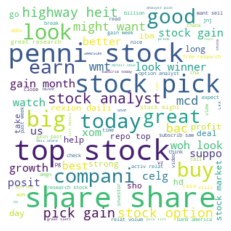

{'share share': 1.0,
 'top stock': 0.989010989010989,
 'penni stock': 0.8131868131868132,
 'stock pick': 0.7186813186813187,
 'big': 0.5296703296703297,
 'look': 0.5065934065934066,
 'today': 0.4857142857142857,
 'good': 0.46923076923076923,
 'buy': 0.46483516483516485,
 'earn': 0.432967032967033,
 'compani': 0.4186813186813187,
 'great': 0.3978021978021978,
 'stock analyst': 0.3802197802197802,
 'highway heit': 0.367032967032967,
 'pick gain': 0.3626373626373626,
 'stock option': 0.35604395604395606,
 'might want': 0.35384615384615387,
 'bac': 0.3516483516483517,
 'wmt': 0.3395604395604396,
 'mcd': 0.33406593406593404,
 'gain month': 0.321978021978022,
 'stock gain': 0.3131868131868132,
 'celg': 0.3076923076923077,
 'woh look': 0.3021978021978022,
 'watch': 0.3010989010989011,
 'us': 0.2945054945054945,
 'look winner': 0.2934065934065934,
 'best': 0.29120879120879123,
 'xom': 0.29120879120879123,
 'growth': 0.2868131868131868,
 'better': 0.2868131868131868,
 'posit': 0.285714285714285

In [50]:
wordcloud = plotWordDensity(tweet_df[(tweet_df['afinn_verdict']=='POSITIVE')])
wordcloud.words_

In [51]:
print(wordcloud.words_.keys())
print(wordcloud.words_.values())

dict_keys(['share share', 'top stock', 'penni stock', 'stock pick', 'big', 'look', 'today', 'good', 'buy', 'earn', 'compani', 'great', 'stock analyst', 'highway heit', 'pick gain', 'stock option', 'might want', 'bac', 'wmt', 'mcd', 'gain month', 'stock gain', 'celg', 'woh look', 'watch', 'us', 'look winner', 'best', 'xom', 'growth', 'better', 'posit', 'suppo', 'rexion daili', 'day', 'long', 'profit', 'help', 'stock market', 'repo top', 'hd', 'take', 'sho', 'ibm', 'go', 'strong', 'deal', 'great research', 'stock might', 'csco', 'research stock', 'nice', 'option analyst', 'billion', 'view', 'use', 'still', 'jnj', 'vz', 'ceo', 'cha', 'gain past', 'move', 'close', 'gain week', 'pg', 'investor', 'break', 'think', 'want sell', 'expect', 'check', 'read', 'free research', 'relat volum', 'cvx', 'activ relat', 'thank', 'time', 'abbv', 'video', 'awesom', 'subscrib saw', 'amgn', 'woh', 'call', 'bank america', 'past week', 'subscrib today', 'back', 'analyst pick', 'ba', 'china', 'great slett', 'wan

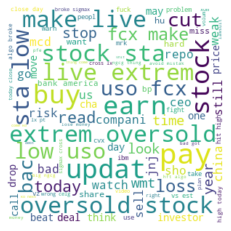

{'pay': 1.0,
 'updat': 0.8281786941580757,
 'earn': 0.7869415807560137,
 'buy': 0.7800687285223368,
 'stock': 0.7216494845360825,
 'extrem oversold': 0.7216494845360825,
 'stock sta': 0.718213058419244,
 'oversold stock': 0.718213058419244,
 'make live': 0.7147766323024055,
 'live extrem': 0.7147766323024055,
 'sta low': 0.7147766323024055,
 'low uso': 0.7147766323024055,
 'uso fcx': 0.7147766323024055,
 'cut': 0.6804123711340206,
 'bac': 0.6219931271477663,
 'fcx make': 0.6219931271477663,
 'loss': 0.6185567010309279,
 'today': 0.6151202749140894,
 'read': 0.6151202749140894,
 'stop': 0.5945017182130584,
 'wmt': 0.563573883161512,
 'look': 0.5360824742268041,
 'year': 0.5292096219931272,
 'time': 0.5223367697594502,
 'compani': 0.5120274914089347,
 'mcd': 0.5051546391752577,
 'watch': 0.4845360824742268,
 'risk': 0.4845360824742268,
 'weak': 0.48109965635738833,
 'bad': 0.47766323024054985,
 'still': 0.47766323024054985,
 'sho': 0.4639175257731959,
 'us': 0.44673539518900346,
 'repo':

In [52]:
wordcloud = plotWordDensity(tweet_df[(tweet_df['afinn_verdict']=='NEGATIVE')])
wordcloud.words_

In [53]:
print(wordcloud.words_.keys())
print(wordcloud.words_.values())

dict_keys(['pay', 'updat', 'earn', 'buy', 'stock', 'extrem oversold', 'stock sta', 'oversold stock', 'make live', 'live extrem', 'sta low', 'low uso', 'uso fcx', 'cut', 'bac', 'fcx make', 'loss', 'today', 'read', 'stop', 'wmt', 'look', 'year', 'time', 'compani', 'mcd', 'watch', 'risk', 'weak', 'bad', 'still', 'sho', 'us', 'repo', 'go', 'jnj', 'china', 'ceo', 'sell', 'investor', 'price', 'day', 'may', 'drop', 'beat', 'think', 'call', 'one', 'deal', 'move', 'cha', 'share', 'hard', 'want', 'miss', 'hu', 'bank america', 'bp', 'problem', 'peopl', 'vz', 'mrk', 'vs est', 'take', 'warn', 'fight', 'cvx', 'fuck', 'use', 'ibm', 'hit high', 'close day', 'high today', 'algo broke', 'broke sigmax', 'sigmax cross', 'cross lx', 'lx pt', 'wrong', 'celg', 'today close', 'right', 'video', 'plan', 'xom', 'volum', 'lose money', 'hft algo', 'lawsuit', 'money', 'avoid mistak', 'pfe', 'bad got', 'big ngcg', 'ngcg thing', 'thing come', 'come ko', 'ko next', 'shit', 'debt'])
dict_values([1.0, 0.8281786941580757